# Randomized Benchmarking: Simultaneous RB

In [1]:
# Needs in terminal:
# $ quilc -S
# $ qvm -S

import numpy as np

from pyquil.api import get_benchmarker
from forest_benchmarking.rb import *

%matplotlib inline

# Run RB experiments

## 1) Generate a single RB experiment

In [13]:
num_sequences = 10
depths = 3 * 2 ** np.arange(3, dtype=np.uint8)

expt = generate_rb_experiment((0, 5), depths, num_sequences)
expt2 = generate_rb_experiment([1], depths, num_sequences)
print(expt)

3:
[CZ 0 5, RX(pi/2) 0, CZ 0 5, RX(pi/2) 5, RZ(-pi/2) 5, RX(-pi/2) 5, RX(-pi/2) 0] ... [CZ 0 5, RX(pi/2) 5, CZ 0 5, RX(pi/2) 5, RX(-pi/2) 0, CZ 0 5, RX(-pi/2) 0]
[RZ(pi/2) 5, RX(-pi/2) 5, RZ(pi/2) 0, RX(pi/2) 0, CZ 0 5, RX(-pi/2) 5, RX(-pi/2) 0, CZ 0 5, RX(-pi/2) 0] ... [RX(-pi) 5, RX(pi/2) 0]
[CZ 0 5, RX(pi/2) 5, RZ(pi/2) 0, RX(pi/2) 0, CZ 0 5, RX(-pi/2) 5, RX(-pi/2) 0, CZ 0 5, RX(-pi/2) 5, RX(-pi/2) 0] ... [RX(-pi/2) 0, CZ 0 5, RX(pi/2) 0, RZ(pi/2) 0]
[RX(-pi/2) 0, CZ 0 5, RX(pi/2) 5, RZ(-pi/2) 5, RX(-pi/2) 5, RX(-pi/2) 0, RZ(-pi) 0] ... [CZ 0 5, RX(pi/2) 0, CZ 0 5, RZ(pi/2) 5, RX(pi/2) 5, CZ 0 5, RZ(pi/2) 0, RX(-pi/2) 0]
[RX(-pi/2) 0, CZ 0 5, RX(-pi/2) 5, CZ 0 5, RZ(-pi) 5, RX(-pi/2) 0, RZ(pi/2) 0, RX(-pi/2) 0] ... [RX(-pi/2) 5, CZ 0 5, RZ(pi/2) 0, RX(-pi/2) 0, CZ 0 5, RX(-pi/2) 5, RX(-pi/2) 0]
[CZ 0 5, RX(-pi/2) 5, RX(pi/2) 0, CZ 0 5, RX(pi/2) 5, RZ(pi/2) 5, RX(-pi/2) 0, RZ(-pi/2) 0, RX(-pi/2) 0] ... [RX(-pi) 0, CZ 0 5, RX(pi/2) 5]
[CZ 0 5, RX(pi/2) 5, RX(-pi/2) 0, CZ 0 5, RX(pi/2)

## 2) Run the RB Sequences on a QuantumComputer

You can rerun this cell and get different results each time.

In [14]:
from pyquil import get_qc
qc = get_qc("9q-square-noisy-qvm")

acquire_rb_data(qc, expt, num_shots=100)

In [15]:
expt

StratumExperiment(layers=(Layer(depth=3, components=[Component(sequence=(<pyquil.quil.Program object at 0x7ffa8455f048>, <pyquil.quil.Program object at 0x7ffa8455f160>, <pyquil.quil.Program object at 0x7ffa8455f208>), measure_qubits=(0, 5), num_shots=100, results=array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
 

## simultaneous

In [16]:
acquire_rb_data(qc, [expt, expt2], num_shots=100)

# 6) Fit the data

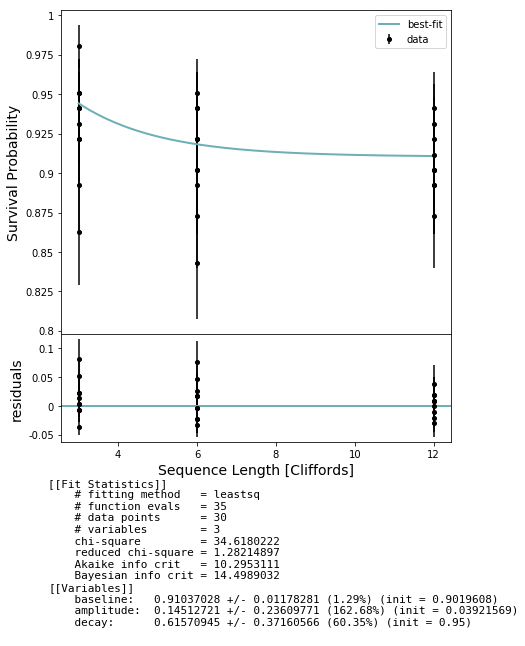

In [17]:
from forest_benchmarking.analysis.fitting import make_figure

fit = fit_rb_results(expt)
fig, axs = make_figure(fit, xlabel="Sequence Length [Cliffords]", ylabel="Survival Probability")
rb_decay = fit.params['decay']

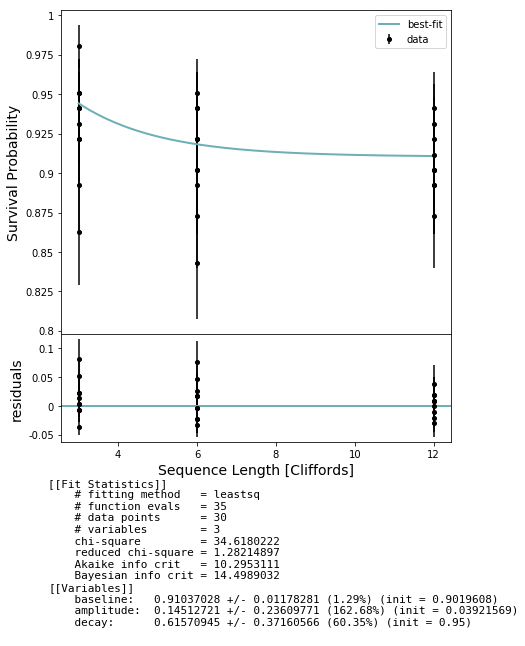

In [17]:
from forest_benchmarking.analysis.fitting import make_figure

fit = fit_rb_results(expt)
fig, axs = make_figure(fit, xlabel="Sequence Length [Cliffords]", ylabel="Survival Probability")
rb_decay = fit.params['decay']

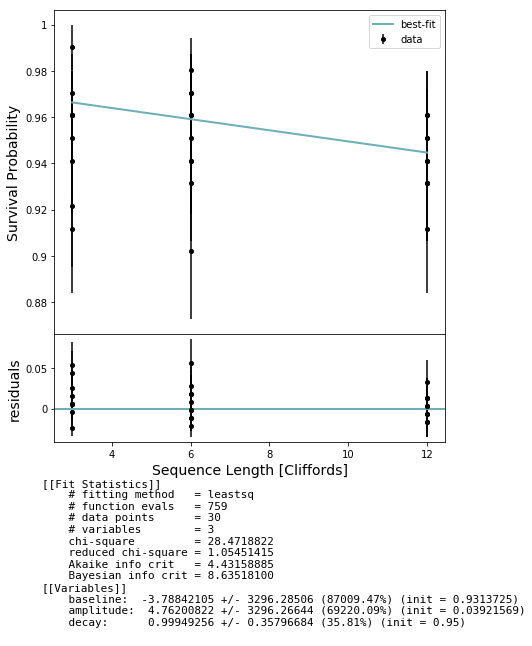

In [18]:
fit = fit_rb_results(expt2)
fig, axs = make_figure(fit, xlabel="Sequence Length [Cliffords]", ylabel="Survival Probability")
rb_decay = fit.params['decay']